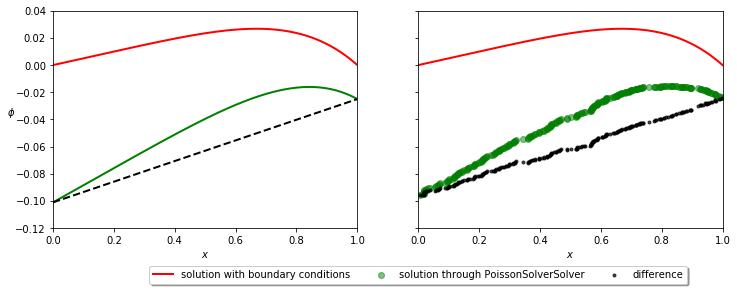

In [5]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

import logging
LOGGER = logging.getLogger(__name__)

from pynhhd import PoissonSolver
from pynhhd import create_logger

#%pylab inline --no-import-all
np.random.seed(0)

create_logger(logging.INFO)

# -----------------------------------------------------            
# create a function on regular grid and some unstructured points 

n = 250
dx = (1.-0.) / (n-1.)

x = dx * np.arange(n)
f = - np.power(x, 3.0)
p = (x - np.power(x, 5.0)) / 20.0

ux = np.sort(np.random.rand(n))
uf = - np.power(ux, 3.0)
up = (ux - np.power(ux, 5.0)) / 20.0

# -----------------------------------------------------            

fsolver = PoissonSolver(solver='F', grid=(n,), spacings=(dx,))
fsolver.prepare()
fp = fsolver.solve(f)

pvols = np.gradient(ux)
ssolver = PoissonSolver(solver='S', points=ux, pvolumes=pvols)
ssolver.prepare()
ufp = fsolver.solve(uf)


# -----------------------------------------------------
# display the functions
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(12,4))

ax1 = axs[0]
ax1.plot(x, p,  linewidth=2, c='r', label='solution with boundary conditions',)
ax1.plot(x, fp, linewidth=2, c='g', label='solution through PoissonSolverSolver')
ax1.plot(x, fp-p, '--', linewidth=2, c='k', label='difference')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$\phi$',rotation=0)
ax1.set_xlim(0,1)
ax1.set_ylim(-0.12,0.04)


ax2 = axs[1]
#ax2.scatter(ux,up,label='solution with boundary conditions',marker='o',c='r',alpha=0.7)
ax2.plot(x, p, linewidth=2, c='r', label='solution with boundary conditions')
ax2.scatter(ux, ufp, c='g', marker='o', alpha=0.5, label='solution through PoissonSolverSolver')
ax2.scatter(ux, ufp-up, c='k', marker='.', alpha=0.7, label='difference')
ax2.set_xlabel('$x$')
#ax2.set_ylabel('$\phi$',rotation=0)
ax2.set_xlim(0,1)
ax2.set_ylim(-0.12,0.04)

# -----------------------------------------------------            
if True:
    #box = ax1.get_position()
    #ax1.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    #box = ax2.get_position()
    #ax2.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

    # Put a legend below current axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.0, -0.15), fancybox=True, shadow=True, ncol=3)

# -----------------------------------------------------            
#pvols2 = np.gradient(x)
#fig = plt.figure()
#plt.plot(ux,pvols)
#plt.plot(x,pvols2)

plt.show()